# IPL Match Analysis and Prediction

In [5]:
#import the libraries
import pandas as pd   #data analysis and manipulation package in the form data structure called data frame
import numpy as np    # to handle multidimensional data, scientific computation
import matplotlib.pyplot as plt   #for visualization
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#load the data
match_df=pd.read_csv("matches.csv")
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
match_df.head(10)   #defaultly only top 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [8]:
match_df.sample(10)   #random_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
198,199,2010,Mumbai,2010-03-28,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Mumbai Indians,41,0,Harbhajan Singh,Dr DY Patil Sports Academy,S Das,K Hariharan,NaN
199,200,2010,Delhi,2010-03-29,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Delhi Daredevils,40,0,DA Warner,Feroz Shah Kotla,SS Hazare,SJA Taufel,NaN
330,331,2012,Hyderabad,2012-05-10,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,DA Warner,"Rajiv Gandhi International Stadium, Uppal",JD Cloete,SJA Taufel,NaN
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
365,366,2012,Chandigarh,2012-05-13,Deccan Chargers,Kings XI Punjab,Deccan Chargers,bat,normal,0,Kings XI Punjab,0,4,DJ Hussey,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,BNJ Oxenford,NaN
174,175,2010,Mumbai,2010-03-12,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews,Dr DY Patil Sports Academy,RE Koertzen,RB Tiffin,NaN
700,11141,2019,Delhi,26/03/19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,6,SR Watson,Feroz Shah Kotla Ground,Marais Erasmus,Nitin Menon,Anil Dandekar
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
581,582,2016,Rajkot,2016-04-14,Rising Pune Supergiants,Gujarat Lions,Rising Pune Supergiants,bat,normal,0,Gujarat Lions,0,7,AJ Finch,Saurashtra Cricket Association Stadium,VA Kulkarni,CK Nandan,NaN
536,537,2015,Visakhapatnam,2015-04-22,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,RK Illingworth,VA Kulkarni,NaN


In [9]:
dlvr_df=pd.read_csv("deliveries.csv")
dlvr_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [10]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Exploratory Data Analysis

In [12]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [13]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [14]:
## checking for missing values
match_df[match_df['winner'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [15]:
# replacing null results #we can replace those values or delete it 
match_df['winner'].fillna('Draw',inplace=True)

In [16]:
match_df[match_df['winner'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [17]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [18]:
#here team names are in string format. generally computers and machine learning works on integer values so we need 
#to impute them by converting into dictionary

team_encodings={
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,   #we have encoded them with same integer to solve the problem 
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala': 12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
        
}

team_encode_dict={
    'team1': team_encodings,
    'team2': team_encodings,
    'toss_winner': team_encodings,
    'winner': team_encodings
    
}

match_df.replace(team_encode_dict,inplace=True)
match_df.head(10)



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,8,10,10,field,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,2,1,1,field,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,3,9,3,bat,normal,0,9,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,7,11,11,field,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,10,1,1,field,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [19]:
#missing values in city col
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [20]:
match_df[match_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [21]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
match_df.describe()   #numerical_statistics

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


## Toss wins and match wins by each team


In [23]:
toss_wins=match_df['toss_winner'].value_counts(sort=True)
match_wins=match_df['winner'].value_counts(sort=True)
print(toss_wins)
match_wins


1     98
2     92
5     89
9     81
3     81
7     80
6     80
10    46
4     43
13    20
8     15
11    13
14    10
12     8
Name: toss_winner, dtype: int64


1     109
5     100
2      92
3      84
9      82
6      75
7      67
10     58
4      29
11     15
8      13
13     12
14     10
12      6
15      4
Name: winner, dtype: int64

In [24]:
#to view these numeric values into string
toss_wins=match_df['toss_winner'].value_counts(sort=True)
match_wins=match_df['winner'].value_counts(sort=True)

for idx,val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]}->{toss_wins[idx]}")

Mumbai Indians->98
Kolkata Knight Riders->92
Chennai Super Kings->89
Kings XI Punjab->81
Royal Challengers Bangalore->81
Delhi Daredevils->80
Rajasthan Royals->80
Sunrisers Hyderabad->46
Deccan Chargers->43
Kochi Tuskers Kerala->20
Gujarat Lions->15
Rising Pune Supergiants->13
Pune Warriors->10
Rising Pune Supergiant->8


In [25]:
for idx,val in match_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]}->{match_wins[idx]}")

Mumbai Indians->109
Chennai Super Kings->100
Kolkata Knight Riders->92
Royal Challengers Bangalore->84
Kings XI Punjab->82
Rajasthan Royals->75
Delhi Daredevils->67
Sunrisers Hyderabad->58
Deccan Chargers->29
Rising Pune Supergiants->15
Gujarat Lions->13
Kochi Tuskers Kerala->12
Pune Warriors->10
Rising Pune Supergiant->6
Delhi Capitals->4


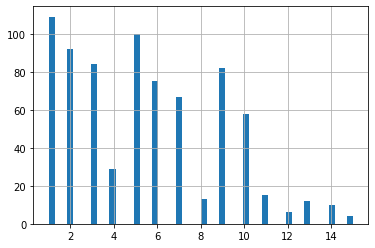

In [26]:
match_df['winner'].hist(bins=50)

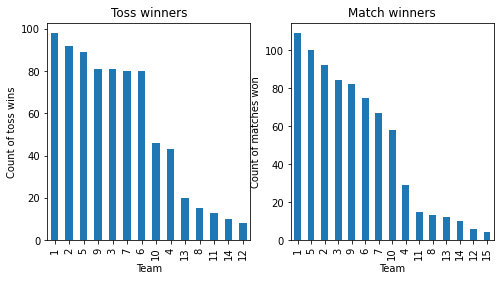

In [27]:
fig= plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title('Toss winners')
toss_wins.plot(kind='bar')

ax2=fig.add_subplot(122)
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title('Match winners')
match_wins.plot(kind='bar')

In [28]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Dropping the redundant column


In [29]:
match_df=match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df   #now consider only those columns which are required for prediction

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,field,14,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


In [30]:
#to convert string(textual) values of venue,toss_decision and city into integer values
#we have 2 methods : label encoding and one hot encoding
#here we used label encoding
from sklearn.preprocessing import LabelEncoder
ftr_list=['city','toss_decision','venue']
encoder=LabelEncoder()
for ftr in ftr_list:
    match_df[ftr]=encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df    

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


## Machine Learning

In [31]:
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(match_df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [42]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score    #cross validation

def print_model_scores(model,data,predictor,target):
    model.fit(data[predictor],data[target])
    predictions=model.predict(data[predictor])
    accuracy=accuracy_score(predictions,data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    score=cross_val_score(model,data[predictor],data[target],scoring="neg_mean_squared_error",cv=5)
    print('Cross-Validation Scores:{}'.format(np.sqrt(-scores)))
    print(f'Average RMSE:{np.sqrt(-scores).mean()}')'''
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")
    
    
    
    

In [44]:
##logistic regression
target_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)


Accuracy : 32.12%
Cross-Validation Score :[3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE: 3.555224332732571


In [45]:
#random forest classifier
model=RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df,predictor_var,target_var)

Accuracy : 88.91%
Cross-Validation Score :[3.70949196 3.92070157 3.56637186 3.44975745 3.7013511 ]
Average RMSE: 3.669534789038117


In [46]:
#sample prediction
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")


[1, 10, '14', 10, '2', '1']
[['1' '10' '14' '10' '2' '1']]
[1]
The winner would be: Mumbai Indians


In [47]:
#feature importance
pd.Series(index= predictor_var, data=model.feature_importances_)


team1            0.221346
team2            0.252033
venue            0.182432
toss_winner      0.160925
city             0.149205
toss_decision    0.034059
dtype: float64

In [48]:
print_model_scores(model, test_df, predictor_var, target_var)


Accuracy : 98.03%
Cross-Validation Score :[3.77171134 2.63353069 2.394438   4.09878031 3.1832897 ]
Average RMSE: 3.2163500073686704


In [ ]:
#https://github.com/dswh/ipl_match_analysis